In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from scipy.stats import linregress

import statsmodels.api as sm

In [70]:
# Load the dataset
df = pd.read_csv("LiveBirthsbyEthnicgroupAgegroupofMotherandChildGender.csv")
print(df)

        month mother_age child_gender mother_race  birth_count
0     2020-01  15  -  19            F     CHINESE            2
1     2020-01  15  -  19            M     CHINESE            7
2     2020-01  15  -  19            F     INDIANS            2
3     2020-01  15  -  19            M     INDIANS            1
4     2020-01  15  -  19            F      MALAYS           10
...       ...        ...          ...         ...          ...
1779  2022-12  40  -  44            F      OTHERS            8
1780  2022-12  40  -  44            M      OTHERS           10
1781  2022-12  45  -  49            F     CHINESE            4
1782  2022-12  45  -  49            M     CHINESE            3
1783  2022-12  45  -  49            M      OTHERS            3

[1784 rows x 5 columns]


In [71]:
#remove mother_age column
df = df.drop('mother_age', axis='columns')

print(df)

        month child_gender mother_race  birth_count
0     2020-01            F     CHINESE            2
1     2020-01            M     CHINESE            7
2     2020-01            F     INDIANS            2
3     2020-01            M     INDIANS            1
4     2020-01            F      MALAYS           10
...       ...          ...         ...          ...
1779  2022-12            F      OTHERS            8
1780  2022-12            M      OTHERS           10
1781  2022-12            F     CHINESE            4
1782  2022-12            M     CHINESE            3
1783  2022-12            M      OTHERS            3

[1784 rows x 4 columns]


In [72]:
#split year and month into 2 separate columns as we want to look into the birth count per year
df[['year', 'month_num']] = df['month'].str.split('-', expand=True)

#Move 'year' to the front column
cols = ['year'] + [col for col in df.columns if col != 'year']
df = df[cols]

#remove 'month' and 'month_num' column
df = df.drop('month', axis='columns')
df = df.drop('month_num', axis='columns')

print(df)

      year child_gender mother_race  birth_count
0     2020            F     CHINESE            2
1     2020            M     CHINESE            7
2     2020            F     INDIANS            2
3     2020            M     INDIANS            1
4     2020            F      MALAYS           10
...    ...          ...         ...          ...
1779  2022            F      OTHERS            8
1780  2022            M      OTHERS           10
1781  2022            F     CHINESE            4
1782  2022            M     CHINESE            3
1783  2022            M      OTHERS            3

[1784 rows x 4 columns]


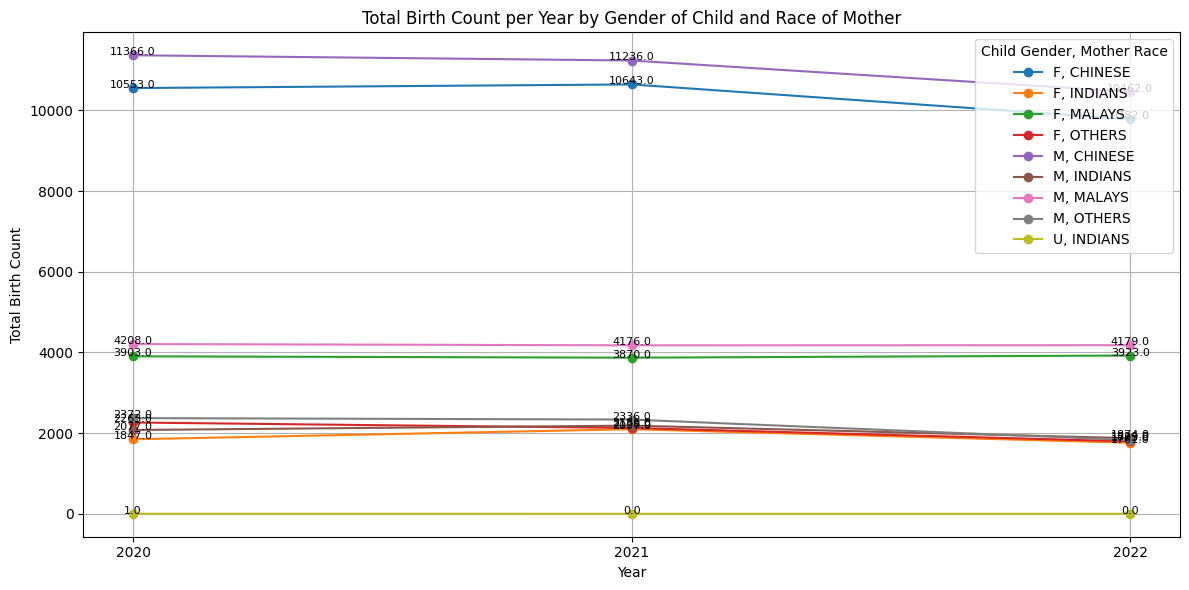

In [73]:
# Group by year, child_gender, and mother_race and sum birth_count
grouped = df.groupby(['year', 'child_gender', 'mother_race'])['birth_count'].sum().reset_index()

# Pivot for plotting
pivot_df = grouped.pivot_table(index='year',
                                columns=['child_gender', 'mother_race'],
                                values='birth_count',
                                fill_value=0)

# Plot data labels
plt.figure(figsize=(12, 6))
for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], marker='o', label=f'{col[0]}, {col[1]}')
    # Add data labels
    for x, y in zip(pivot_df.index, pivot_df[col]):
        plt.text(x, y + 0.5, str(y), ha='center', fontsize=8)

# Plot linegraph
plt.title('Total Birth Count per Year by Gender of Child and Race of Mother')
plt.xlabel('Year')
plt.ylabel('Total Birth Count')
plt.grid(True)
plt.legend(title='Child Gender, Mother Race')
plt.tight_layout()

plt.show()

#Outlier (U, Indians) detected

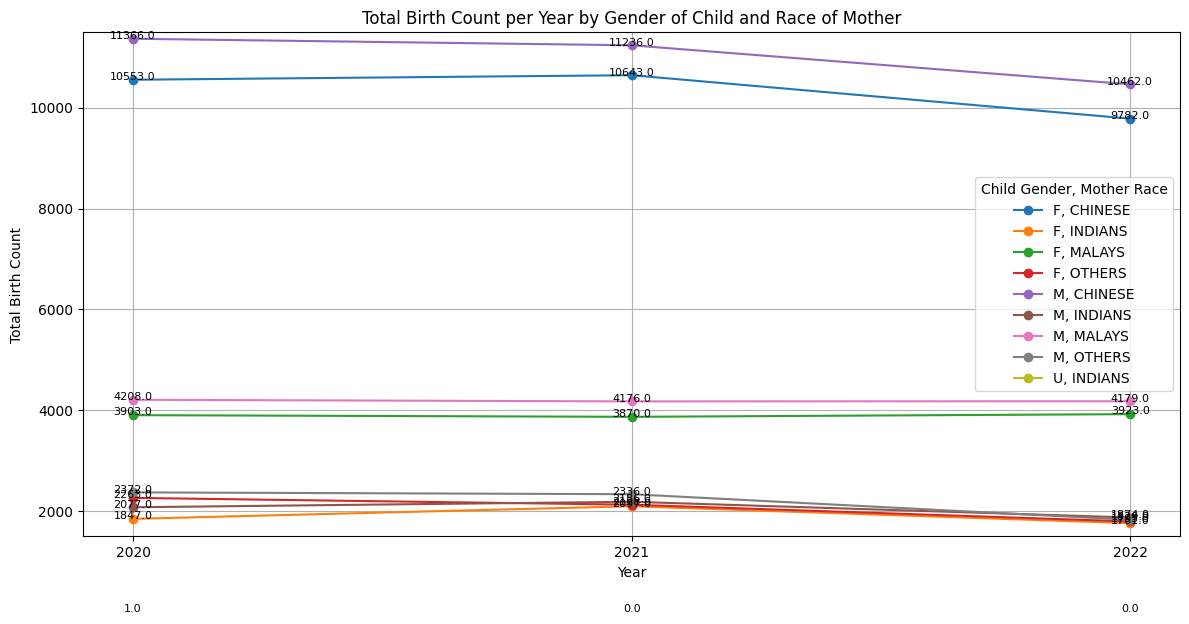

In [74]:
# Group by year, child_gender, and mother_race and sum birth_count
grouped = df.groupby(['year', 'child_gender', 'mother_race'])['birth_count'].sum().reset_index()

# Pivot for plotting
pivot_df = grouped.pivot_table(index='year',
                                columns=['child_gender', 'mother_race'],
                                values='birth_count',
                                fill_value=0)

# Plot data labels
plt.figure(figsize=(12, 6))
for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], marker='o', label=f'{col[0]}, {col[1]}')
    # Add data labels
    for x, y in zip(pivot_df.index, pivot_df[col]):
        plt.text(x, y + 0.5, str(y), ha='center', fontsize=8)

# Plot linegraph
plt.title('Total Birth Count per Year by Gender of Child and Race of Mother')
plt.xlabel('Year')
plt.ylabel('Total Birth Count')
plt.grid(True)
plt.legend(title='Child Gender, Mother Race')
plt.tight_layout()

#exclude outlier (i.e U, Indian) and improve graph resolution
plt.ylim([1500, 11500])

plt.show()

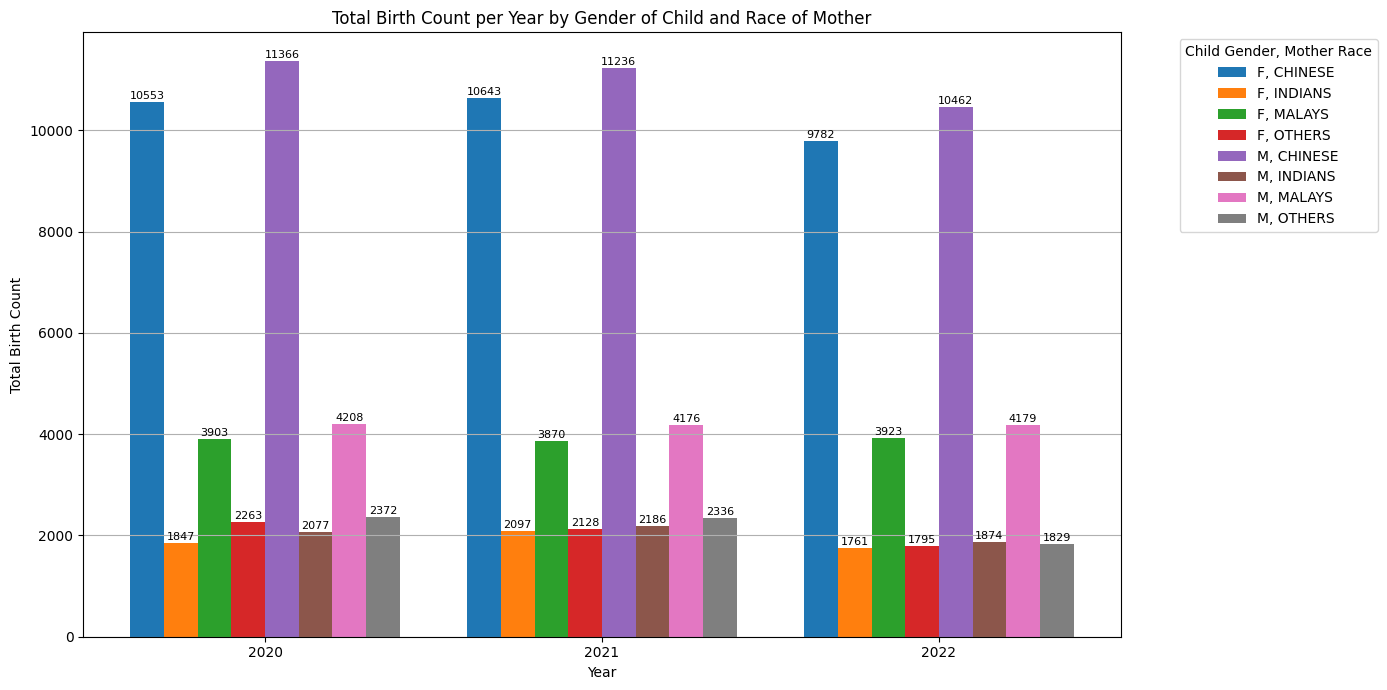

In [64]:
# Group by year, gender, and race
grouped = df.groupby(['year', 'child_gender', 'mother_race'])['birth_count'].sum().reset_index()

# Remove outliers (i.e 'U', 'INDIANS')
grouped = grouped[~((grouped['child_gender'] == 'U') & (grouped['mother_race'].str.upper() == 'INDIANS'))]

# Create label for each gender-race combo
grouped['label'] = grouped['child_gender'] + ', ' + grouped['mother_race']

# Pivot for plotting
pivot_df = grouped.pivot_table(index='year', columns='label', values='birth_count', fill_value=0)

# Plotting grouped bar chart with data labels
fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.8 / len(pivot_df.columns)  # spacing for grouped bars
x = np.arange(len(pivot_df.index))  # positions for years

# Plot each bar group
for i, col in enumerate(pivot_df.columns):
    bar_positions = x + i * bar_width
    bars = ax.bar(bar_positions, pivot_df[col], bar_width, label=col)

    # Add data labels
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 20, int(yval),
                ha='center', va='bottom', fontsize=8)

# Format chart
ax.set_xticks(x + bar_width * (len(pivot_df.columns) - 1) / 2)
ax.set_xticklabels(pivot_df.index)
ax.set_title('Total Birth Count per Year by Gender of Child and Race of Mother')
ax.set_xlabel('Year')
ax.set_ylabel('Total Birth Count')
ax.legend(title='Child Gender, Mother Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


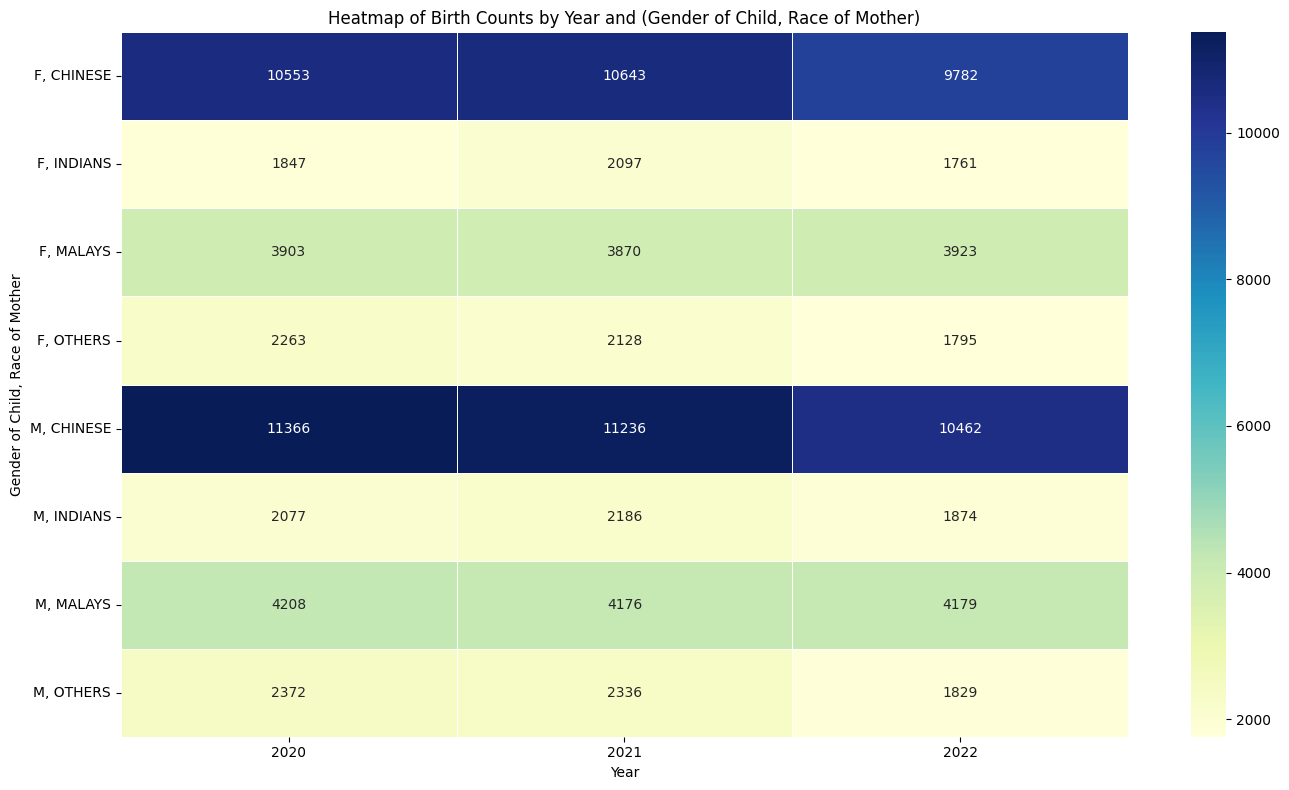

In [75]:
# Group by year, child_gender, mother_race and sum the birth counts
grouped = df.groupby(['year', 'child_gender', 'mother_race'])['birth_count'].sum().reset_index()

# Remove anomalies (i.e 'U', 'INDIANS')
grouped = grouped[~((grouped['child_gender'] == 'U') & (grouped['mother_race'].str.upper() == 'INDIANS'))]

# Create a new label column for rows
grouped['label'] = grouped['child_gender'] + ', ' + grouped['mother_race']

# Pivot to get matrix for heatmap: rows = label, columns = year
heatmap_data = grouped.pivot(index='label', columns='year', values='birth_count').fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Birth Counts by Year and (Gender of Child, Race of Mother)")
plt.xlabel("Year")
plt.ylabel("Gender of Child, Race of Mother")
plt.tight_layout()
plt.show()


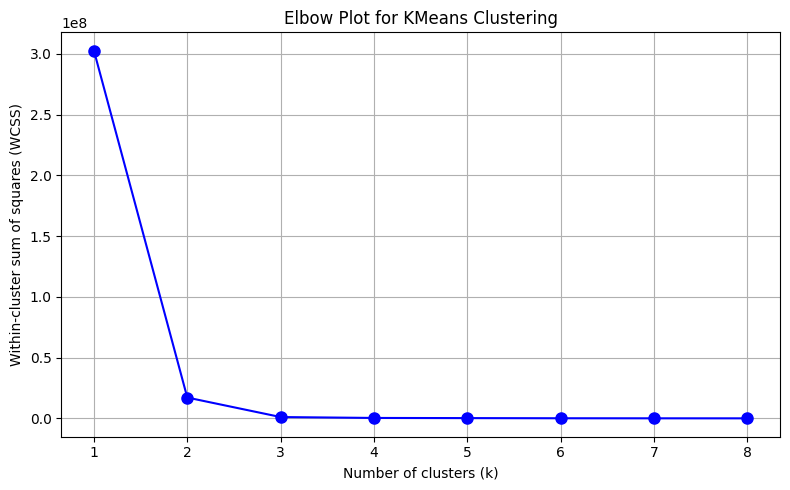

In [76]:
# Group by year, gender, and race
grouped = df.groupby(['year', 'child_gender', 'mother_race'])['birth_count'].sum().reset_index()

# Remove anomalies (i.e 'U', 'INDIANS')
grouped = grouped[~((grouped['child_gender'] == 'U') & (grouped['mother_race'].str.upper() == 'INDIANS'))]

# Create features: pivot so each row is (gender, race), columns = years, values = birth counts
grouped['label'] = grouped['child_gender'] + ', ' + grouped['mother_race']
pivot_df = grouped.pivot_table(index='label', columns='year', values='birth_count', fill_value=0)

# Elbow method
wcss = []
K = range(1, min(11, len(pivot_df) + 1))  # Ensure k <= number of samples

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', markersize=8)
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.grid(True)
plt.tight_layout()
plt.show()

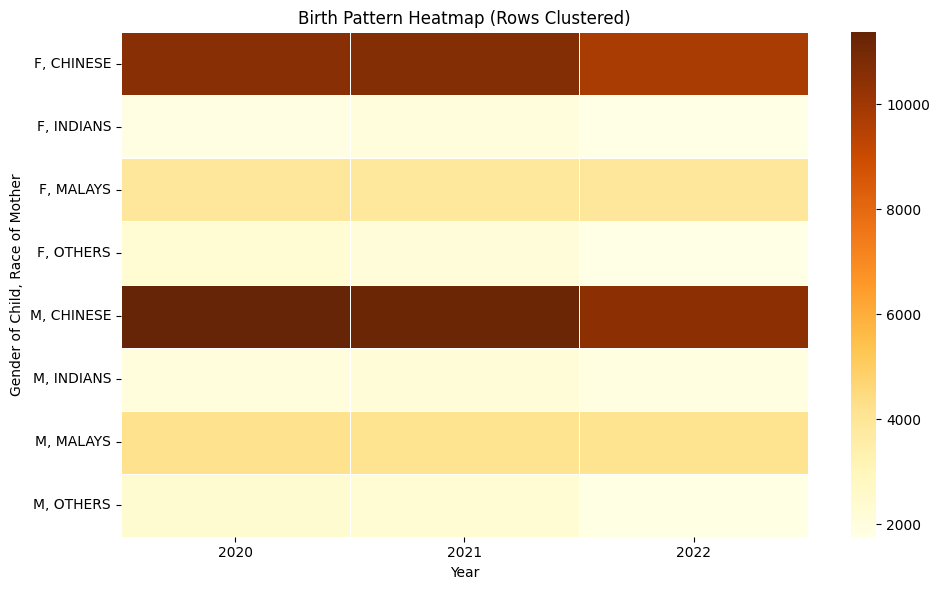

year        Cluster
label              
F, CHINESE        1
F, INDIANS        2
F, MALAYS         0
F, OTHERS         2
M, CHINESE        1
M, INDIANS        2
M, MALAYS         0
M, OTHERS         2


In [77]:
# Group by year, gender, and race
grouped = df.groupby(['year', 'child_gender', 'mother_race'])['birth_count'].sum().reset_index()

# Remove anomalies (i.e 'U', 'INDIANS')
grouped = grouped[~((grouped['child_gender'] == 'U') & (grouped['mother_race'].str.upper() == 'INDIANS'))]

# Create label for each gender-race combo
grouped['label'] = grouped['child_gender'] + ', ' + grouped['mother_race']

# Pivot to get feature matrix: rows = label, columns = years
pivot_df = grouped.pivot_table(index='label', columns='year', values='birth_count', fill_value=0)

# Run KMeans with a chosen number of clusters (e.g., 3)
k = 3  # You can change this based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(pivot_df)

# Add cluster labels to the DataFrame
pivot_df['Cluster'] = clusters

# Optional: visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df.drop('Cluster', axis=1), cmap='YlOrBr', cbar=True, linewidths=0.5)
plt.title('Birth Pattern Heatmap (Rows Clustered)')
plt.xlabel('Year')
plt.ylabel('Gender of Child, Race of Mother')
plt.tight_layout()
plt.show()

# Show cluster assignments
print(pivot_df[['Cluster']])


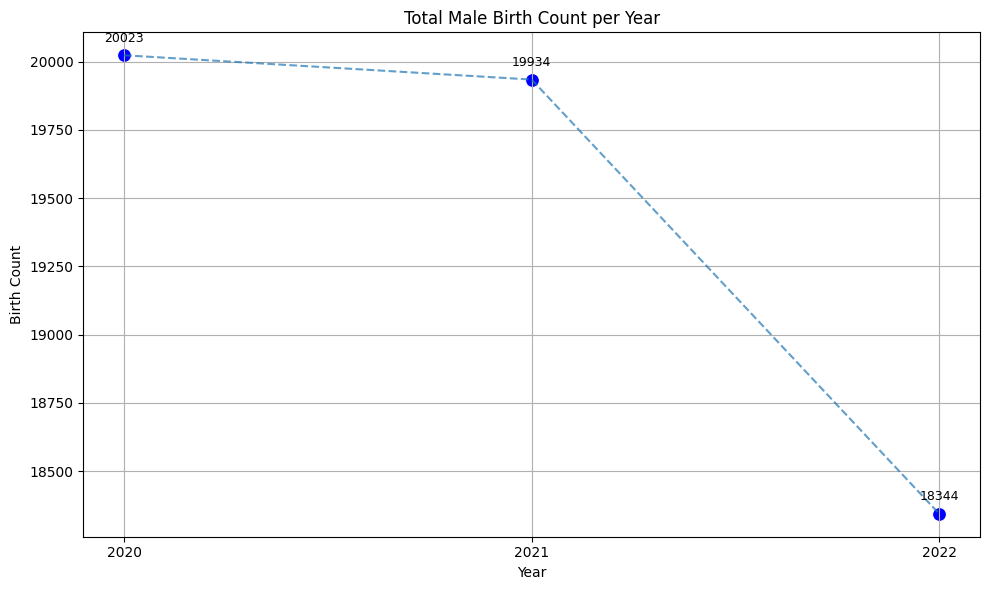

In [78]:
# Filter for males only
df_male = df[df['child_gender'] == 'M']

# Group by year and sum birth counts
male_yearly = df_male.groupby('year')['birth_count'].sum().reset_index()

# Convert year and birth_count to numeric (if needed)
male_yearly['year'] = pd.to_numeric(male_yearly['year'], errors='coerce')
male_yearly['birth_count'] = pd.to_numeric(male_yearly['birth_count'], errors='coerce')
male_yearly = male_yearly.dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=male_yearly, x='year', y='birth_count', color='blue', s=100)
plt.plot(male_yearly['year'], male_yearly['birth_count'], linestyle='--', alpha=0.7)

# Add data labels
for _, row in male_yearly.iterrows():
    plt.text(row['year'], row['birth_count'] + 50, int(row['birth_count']), ha='center', fontsize=9)

# Plot only 2020, 2021 and 2022 on the x-axis
plt.xticks([2020, 2021, 2022])

plt.title('Total Male Birth Count per Year')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.grid(True)
plt.tight_layout()
plt.show()


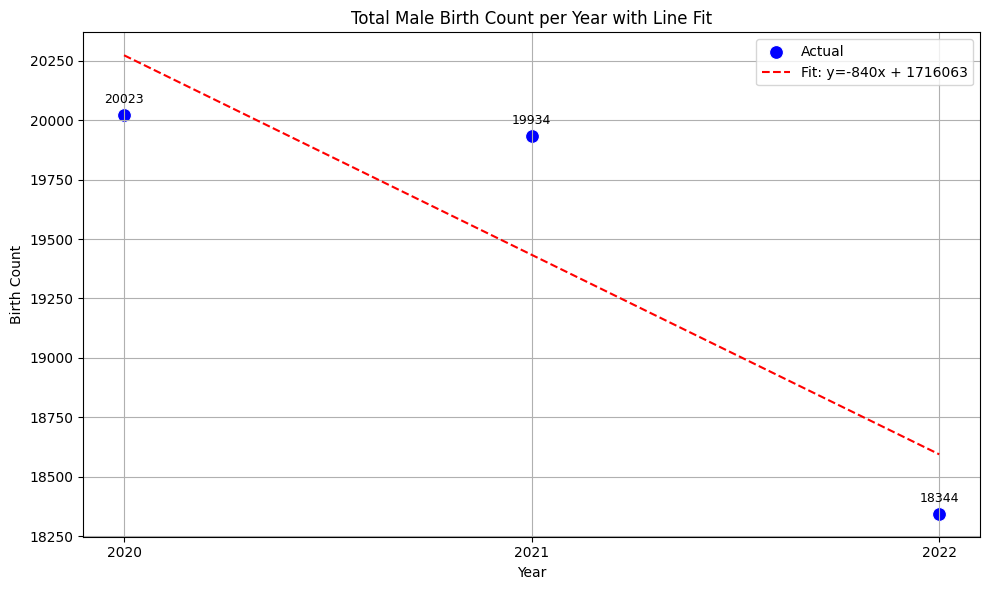

In [79]:
# Filter for males only
df_male = df[df['child_gender'] == 'M']

# Group by year and sum birth counts
male_yearly = df_male.groupby('year')['birth_count'].sum().reset_index()

# Convert to numeric
male_yearly['year'] = pd.to_numeric(male_yearly['year'], errors='coerce')
male_yearly['birth_count'] = pd.to_numeric(male_yearly['birth_count'], errors='coerce')
male_yearly = male_yearly.dropna()

# Linear regression fitting
slope, intercept, r_value, p_value, std_err = linregress(male_yearly['year'], male_yearly['birth_count'])
male_yearly['fitted'] = intercept + slope * male_yearly['year']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=male_yearly, x='year', y='birth_count', color='blue', s=100, label='Actual')
plt.plot(male_yearly['year'], male_yearly['fitted'], color='red', linestyle='--', label=f'Fit: y={slope:.0f}x + {intercept:.0f}')

# Add data labels
for _, row in male_yearly.iterrows():
    plt.text(row['year'], row['birth_count'] + 50, int(row['birth_count']), ha='center', fontsize=9)

# Set x-axis ticks to 2020–2022
plt.xticks([2020, 2021, 2022])

plt.title('Total Male Birth Count per Year with Line Fit')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [80]:
## initiate linear regression model
model = LinearRegression(fit_intercept = False)

# define predictor and response variables
X, y = df_male['year'].values.reshape(-1, 1), df_male['birth_count']

## fit regression model
model.fit(X, y)

## save the coefficient
model1_coef = model.coef_

## display regression coefficients and R-squared value of the moodel
print(model.intercept_, model.coef_, model.score(X,y))

0.0 [0.03205299] -4.943411288094168e-06
